House Sales in King County, USA
Fatemeh Shah-Mohammadi 

This Jupyter Notebook is a hands-on project performed during the data analysis course by IBM/Coursera.

This dataset contains house sale prices for King County, which includes Seattle. It includes homes sold between May 2014 and May 2015.

id :a notation for a house

date: Date house was sold

price: Price is prediction target

bedrooms: Number of Bedrooms/House

bathrooms: Number of bathrooms/bedrooms

sqft_living: square footage of the home

sqft_lot: square footage of the lot

floors :Total floors (levels) in house

waterfront :House which has a view to a waterfront

view: Has been viewed

condition :How good the condition is Overall

grade: overall grade given to the housing unit, based on King County grading system

sqft_above :square footage of house apart from basement

sqft_basement: square footage of the basement

yr_built :Built Year

yr_renovated :Year when house was renovated

zipcode:zip code

lat: Latitude coordinate

long: Longitude coordinate

sqft_living15 :Living room area in 2015(implies-- some renovations) This might or might not have affected the lotsize area

sqft_lot15 :lotSize area in 2015(implies-- some renovations)
    
You will need to use the following Libraries

In [306]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression,Ridge
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import r2_score, mean_squared_error
%matplotlib inline

## reading the file

In [183]:
file_name='https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/coursera/project/kc_house_data_NaN.csv'
df = pd.read_csv(file_name)
df.head()

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,7129300520,20141013T000000,221900.0,3.0,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,6414100192,20141209T000000,538000.0,3.0,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2,5631500400,20150225T000000,180000.0,2.0,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,3,2487200875,20141209T000000,604000.0,4.0,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,4,1954400510,20150218T000000,510000.0,3.0,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


## Chech type of features and have a quick look at the features

In [184]:
#df.describe(include=all)
df.describe()

,Unnamed: 0,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21613.00000,2.161300e+04,2.161300e+04,21600.000000,21603.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,10806.00000,4.580302e+09,5.400881e+05,3.372870,2.115736,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,6239.28002,2.876566e+09,3.671272e+05,0.926657,0.768996,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,0.00000,1.000102e+06,7.500000e+04,1.000000,0.500000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,5403.00000,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,10806.00000,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,16209.00000,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,21612.00000,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [185]:
df.dtypes

Unnamed: 0         int64
id                 int64
date              object
price            float64
bedrooms         float64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

## Data wranling

In [186]:
df.drop(['Unnamed: 0','id'], inplace=True,axis=1)

In [187]:
df.head(10)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,20141013T000000,221900.0,3.0,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,20141209T000000,538000.0,3.0,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,20150225T000000,180000.0,2.0,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,20141209T000000,604000.0,4.0,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,20150218T000000,510000.0,3.0,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
5,20140512T000000,1225000.0,4.0,4.50,5420,101930,1.0,0,0,3,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
6,20140627T000000,257500.0,3.0,2.25,1715,6819,2.0,0,0,3,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
7,20150115T000000,291850.0,3.0,1.50,1060,9711,1.0,0,0,3,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711
8,20150415T000000,229500.0,3.0,1.00,1780,7470,1.0,0,0,3,7,1050,730,1960,0,98146,47.5123,-122.337,1780,8113
9,20150312T000000,323000.0,3.0,2.50,1890,6560,2.0,0,0,3,7,1890,0,2003,0,98038,47.3684,-122.031,2390,7570


## check for nan values

In [188]:
df.isnull().values.any()
print(len(df['price']))

21613


In [189]:
for item in df.columns:
    #print(len(df[item]))
    if df[item].isnull().values.any():
        print(item)
          #df.dropna(subset=["col"], axis=0, inplace=True)
        mean = df[item].mean()
        df[item].replace(np.nan, mean, inplace=True)
        print(df[item].isnull().values.sum())


bedrooms
0
bathrooms
0


## EDA

In [76]:
df.corr()['price'].sort_values

<bound method Series.sort_values of price            1.000000
bedrooms         0.308797
bathrooms        0.525738
sqft_living      0.702035
sqft_lot         0.089661
floors           0.256794
waterfront       0.266369
view             0.397293
condition        0.036362
grade            0.667434
sqft_above       0.605567
sqft_basement    0.323816
yr_built         0.054012
yr_renovated     0.126434
zipcode         -0.053203
lat              0.307003
long             0.021626
sqft_living15    0.585379
sqft_lot15       0.082447
Name: price, dtype: float64>

In [236]:
pearson_coef, p_value = stats.pearsonr(df['bedrooms'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value) 

pearson_coef, p_value = stats.pearsonr(df['floors'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value) 

pearson_coef, p_value = stats.pearsonr(df['sqft_living'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value) 

The Pearson Correlation Coefficient is 0.3087968022200257  with a P-value of P = 0.0
The Pearson Correlation Coefficient is 0.2567938875507184  with a P-value of P = 1.6e-322
The Pearson Correlation Coefficient is 0.7020350546118002  with a P-value of P = 0.0


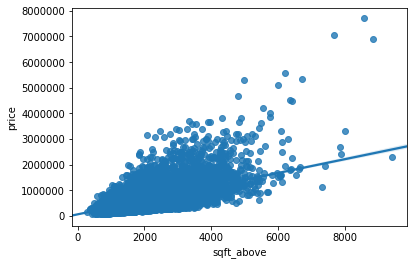

In [73]:
sns.regplot(x= "sqft_above", y= "price", data = df)

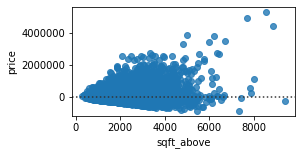

In [94]:
width = 4
height = 2
plt.figure(figsize=(width, height))
sns.residplot(x= 'sqft_above', y='price', data = df)
plt.show()

In [67]:
df['floors'].unique()

array([1. , 2. , 1.5, 3. , 2.5, 3.5])

In [69]:
 df["floors"].value_counts()

1.0    10680
2.0     8241
1.5     1910
3.0      613
2.5      161
3.5        8
Name: floors, dtype: int64

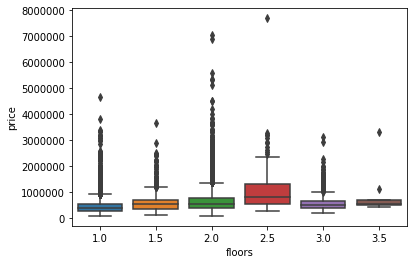

In [70]:
sns.boxplot(x= 'floors', y = 'price', data=df)

0    21450
1      163
Name: waterfront, dtype: int64


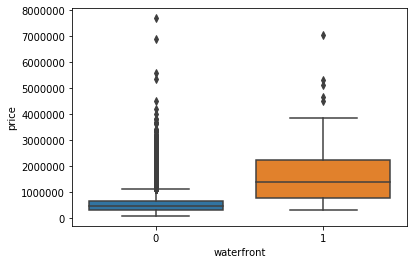

In [90]:
# skewed feature
sns.boxplot(x= 'waterfront', y = 'price', data=df)
# this is intereting feature
print(df['waterfront'].value_counts())

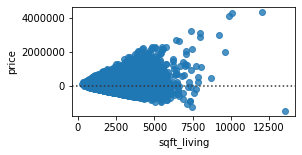

In [83]:
# checking for linear regression possibility checking whether the simple regression model is appropriate for a dataset.
width = 4
height = 2
plt.figure(figsize=(width, height))
sns.residplot(x= 'sqft_living', y='price', data = df)
plt.show()


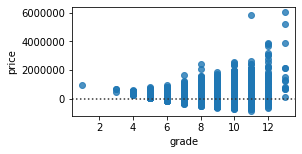

In [85]:
width = 4
height = 2
plt.figure(figsize=(width, height))
sns.residplot(x='grade', y= 'price', dropna = True, data = df)
plt.show()

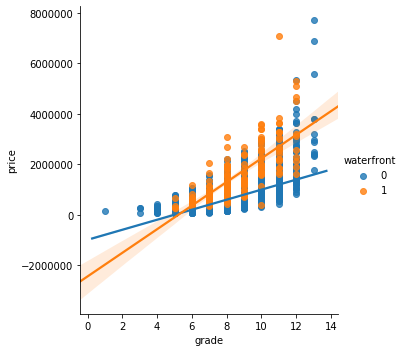

In [86]:
sns.lmplot(x="grade", y="price", hue="waterfront", data=df);


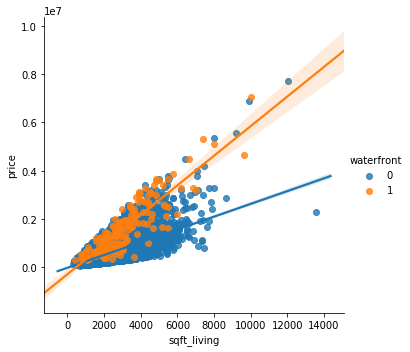

In [87]:
sns.lmplot(x= 'sqft_living', y='price', hue="waterfront", data=df);


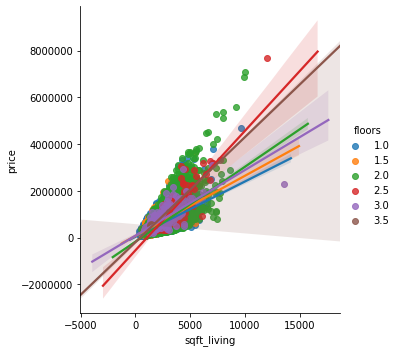

In [91]:
sns.lmplot(x= 'sqft_living', y='price', hue="floors", data=df);


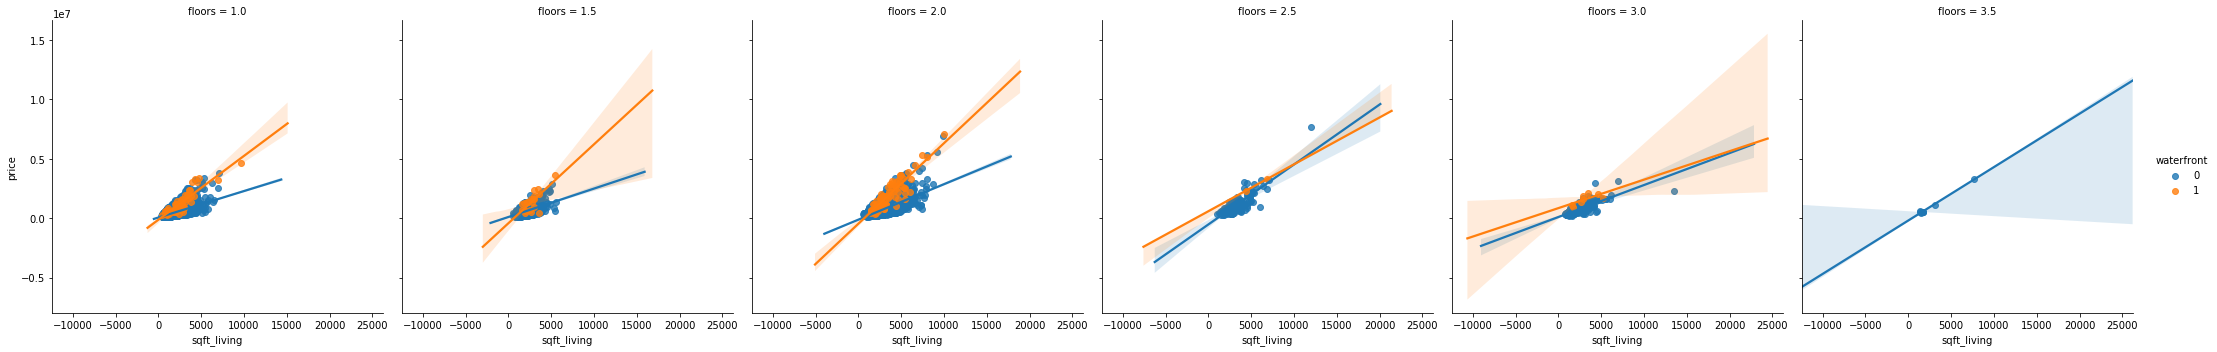

In [92]:
sns.lmplot(x= 'sqft_living', y='price', hue="waterfront", col = 'floors', data=df);


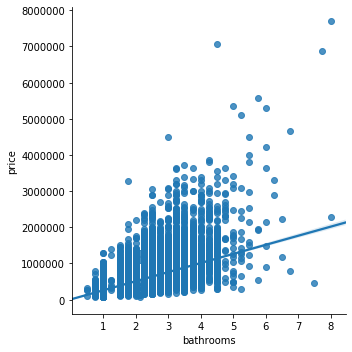

In [101]:
sns.lmplot(x= 'bathrooms', y='price', data=df);


In [124]:
df_gptest = df[['floors','bathrooms','price']]
grouped_test1 = df_gptest.groupby(['floors','bathrooms'],as_index=False).mean()
grouped_test1

,floors,bathrooms,price
0,1.0,0.500000,2.123333e+05
1,1.0,0.750000,2.887875e+05
2,1.0,1.000000,3.273381e+05
3,1.0,1.250000,3.787500e+05
4,1.0,1.500000,3.791138e+05
...,...,...,...
104,3.5,2.115736,1.095000e+06
105,3.5,2.500000,5.288333e+05
106,3.5,2.750000,5.250000e+05
107,3.5,3.000000,4.800000e+05


In [126]:
grouped_pivot = grouped_test1.pivot(index='bathrooms',columns='floors')
grouped_pivot

price                ...                            
floors              1.0           1.5  ...           3.0           3.5
bathrooms                              ...                            
0.500000   2.123333e+05           NaN  ...           NaN           NaN
0.750000   2.887875e+05  3.266000e+05  ...           NaN           NaN
1.000000   3.273381e+05  4.254203e+05  ...  3.489750e+05           NaN
1.250000   3.787500e+05  7.610000e+05  ...  9.522500e+05           NaN
1.500000   3.791138e+05  5.061980e+05  ...  3.796500e+05           NaN
1.750000   4.375890e+05  5.305852e+05  ...  5.583782e+05           NaN
2.000000   4.257078e+05  5.440047e+05  ...  4.279955e+05           NaN
2.115736   2.241900e+05           NaN  ...  3.800000e+05  1.095000e+06
2.250000   5.088736e+05  6.773475e+05  ...  5.030079e+05           NaN
2.500000   5.875546e+05  7.103942e+05  ...  5.597852e+05  5.288333e+05
2.750000   6.013308e+05  7.173303e+05  ...  7.816433e+05  5.250000e+05
3.000000   6.180651e+05  7.851546e+05  ...  5.524850e+05  4.800000e+05
3.250000   1.081465e+06  1.153621e+06  ...  6.647490e+05           NaN
3.500000   1.045344e+06  9.608526e+05  ...  7.542293e+05           NaN
3.750000   1.236697e+06  1.241636e+06  ...  1.175951e+06           NaN
4.000000   1.021314e+06  7.653135e+05  ...  1.248342e+06  3.300000e+06
4.250000   1.662333e+06  1.884315e+06  ...  1.916667e+06           NaN
4.500000   1.124000e+06  6.075000e+05  ...  1.631938e+06           NaN
4.750000   1.343000e+06  2.267450e+06  ...  9.889900e+05           NaN
5.000000   2.013750e+06           NaN  ...           NaN           NaN
5.250000   1.148000e+06           NaN  ...           NaN           NaN
5.500000   2.608333e+06           NaN  ...           NaN           NaN
5.750000            NaN           NaN  ...           NaN           NaN
6.000000            NaN           NaN  ...           NaN           NaN
6.250000            NaN           NaN  ...           NaN           NaN
6.500000            NaN           NaN  ...           NaN           NaN
6.750000   4.668000e+06           NaN  ...           NaN           NaN
7.500000            NaN           NaN  ...           NaN           NaN
7.750000            NaN           NaN  ...           NaN           NaN
8.000000            NaN           NaN  ...  2.280000e+06           NaN

[30 rows x 6 columns]

## Model Developement

In [190]:
lm = LinearRegression()

In [210]:
features =["floors", "waterfront","lat" ,"bedrooms" ,"sqft_basement" ,"view" ,"bathrooms","sqft_living15","sqft_above","grade","sqft_living"]


In [254]:
Y = df['price']
print(type(y))
X = df[features]
pr = PolynomialFeatures(degree=2,include_bias=False)
print(pr.fit_transform(X)[0].shape)

<class 'pandas.core.frame.DataFrame'>
(77,)


In [216]:
lm.fit(X, Y)
Yhat=lm.predict(X)
r2_score(Y,Yhat)

0.657697919816199

In [228]:
degree = [2,3,4]
for item in degree:
    Input=[('scale',StandardScaler()),('polynomial', PolynomialFeatures(degree= item, include_bias=False)),('model',LinearRegression())]
    pipe = Pipeline(Input)
    pipe.fit(X,Y)
    print(pipe.score(X,Y))
    Yhat = pipe.predict(X)
    print(r2_score(Yhat,Y))

0.7513406991984581
0.6690597916275771
0.8141688042439488
0.7717533052055613
0.856256074842576
0.8321186239033094


In [ ]:
degree = [2,3,4]
for item in degree:
    Input=[('scale',StandardScaler()),('polynomial', PolynomialFeatures(degree= item, include_bias=False)),('model',LinearRegression())]
    pipe = Pipeline(Input)
    pipe.fit(X,Y)
    print(pipe.score(X,Y))
    Yhat = pipe.predict(X)
    print(r2_score(Yhat,Y))

## cross validation

In [256]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

In [293]:
model = LinearRegression()
S = StandardScaler()

print(X.head())
degree = [1,2,3]
Loss = []
Loss2 = []
for d in degree:
    pr = PolynomialFeatures(degree= d, include_bias=False)
    X_scaler = S.fit_transform(X)
    X_pr = pr.fit_transform(X_scaler)

    
    print('degree {}, score {}'.format(d,cross_val_score(model,X_pr,Y,cv=3).mean()))
    Yhat = cross_val_predict(model,X_pr,Y,cv=3)
    Loss2.append(mean_squared_error(Y,Yhat))
    Loss.append(-1 * cross_val_score(model,X_pr, Y,cv=4,scoring='neg_mean_squared_error').mean())
    print('MSE: ',Loss[-1])
    print('\n')

   floors  waterfront      lat  ...  sqft_above  grade  sqft_living
0     1.0           0  47.5112  ...        1180      7         1180
1     2.0           0  47.7210  ...        2170      7         2570
2     1.0           0  47.7379  ...         770      6          770
3     1.0           0  47.5208  ...        1050      7         1960
4     1.0           0  47.6168  ...        1680      8         1680

[5 rows x 11 columns]
degree 1, score 0.6545139889064849
MSE:  46539351472.10402


degree 2, score 0.7345163195597607
MSE:  36555803748.74955


degree 3, score 0.6444737919653385
MSE:  139676628655.27316




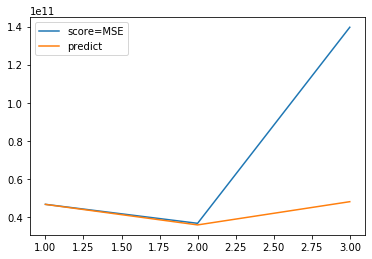

best degree:  1
best Loss:  36555803748.74955


In [294]:
plt.plot(degree,Loss,label='score=MSE')
plt.plot(degree,Loss2,label='predict')
plt.legend()
plt.show()
a = np.argsort(Loss)
b = np.sort(Loss)
print('best degree: ', a[0])
print('best Loss: ', Loss[a[0]])


In [315]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, random_state = 0)
print("number of test samples :", X_test.shape[0])
print("number of training samples:",X_train.shape[0])

number of test samples : 2162
number of training samples: 19451


In [316]:
pr = PolynomialFeatures(degree=a[0]+1)
X_scaler_train = S.fit_transform(X_train)
X_train_pr = pr.fit_transform(X_scaler_train)

X_scaler_test = S.fit_transform(X_test)
X_test_pr = pr.fit_transform(X_scaler_test)


model.fit(X_train_pr,Y_train)
Yhat = model.predict(X_test_pr)
print('score {} and mse {}'.format(r2_score(Yhat,Y_test),mean_squared_error(Yhat,Y_test)))

score -0.0005330058758903355 and mse 4.8282430847542224e+32


In [317]:
RidgeModel1=Ridge(alpha=0.1)
RidgeModel1.fit(X_train_pr,Y_train)
RidgeModel1.score(X_test_pr,Y_test)

0.7304462740961181